In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import multinomial, dirichlet, norm

In [2]:
data = pd.read_csv('/Users/ash/Downloads/socialmobility.csv')

In [4]:
data

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


In [31]:
prior_para = [1,1,1,1]
prior = dirichlet(prior_para)
def post_dir(prior_para, counts):
    post_para = prior_para + counts 
    return dirichlet(post_para)    

(0.312198722173942, 0.3381278699043047)


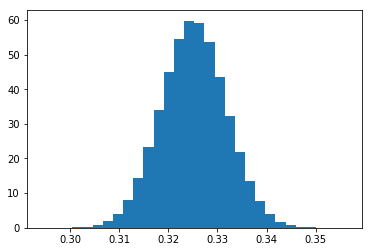

In [32]:
unskilled_f = np.array(data['count'].loc[data['father']=='unskilled'])

posterior_s = post_dir(prior_para, unskilled_f)
samples_1 = posterior_s.rvs(1000000)
print(norm.interval(0.95,np.mean(samples_1[:,2]),np.std(samples_1[:,2])))

plt.hist(samples_1[:,2], density=True,bins=30)
plt.show()

(0.12372853819757165, 0.13809021878668645)


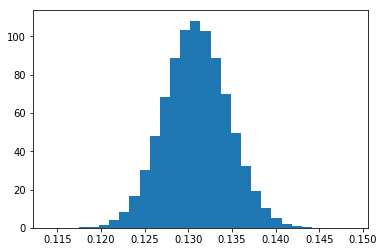

In [24]:
proffessional_s = np.array(data['count'].loc[data['son']=='professional'])

posterior_f = post_dir(prior_para, proffessional_s)
samples_2 = posterior_f.rvs(1000000)
print(norm.interval(0.95,np.mean(samples_2[:,0]),np.std(samples_2[:,0])))

plt.hist(samples_2[:,0], density=True,bins=30)
plt.show()

In [26]:
prior_para = np.ones(16)
prior = dirichlet(prior_para)

In [30]:
all_post = post_dir(prior_para, np.array(data['count']))
samples_3 = all_post.rvs(1000000)
for _ in range(4,8): 
    print(norm.interval(0.95,np.mean(samples_3[:,_]),np.std(samples_3[:,_])))

(0.0020811723561411743, 0.003504570835308357)
(0.07945290203650827, 0.08690733640782271)
(0.07361504536326476, 0.0808173097432811)
(0.07073868547346987, 0.07782138876725245)
